# Explore here

In [2]:
# Your code here
import shutil 
import os

def separar_imagenes(ruta_carpeta):
    archivos = os.listdir(ruta_carpeta)
    for archivo in archivos:
        if archivo.startswith('dog'):
            destino = os.path.join(ruta_carpeta,'dog')
        elif archivo.startswith('cat'):
            destino = os.path.join(ruta_carpeta,'cat')
        else:
            continue
        if not os.path.exists(destino):
            os.makedirs(destino)
        shutil.move(os.path.join(ruta_carpeta,archivo),destino)

separar_imagenes('../data/raw/train')


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/train'

../data/raw/train\dog


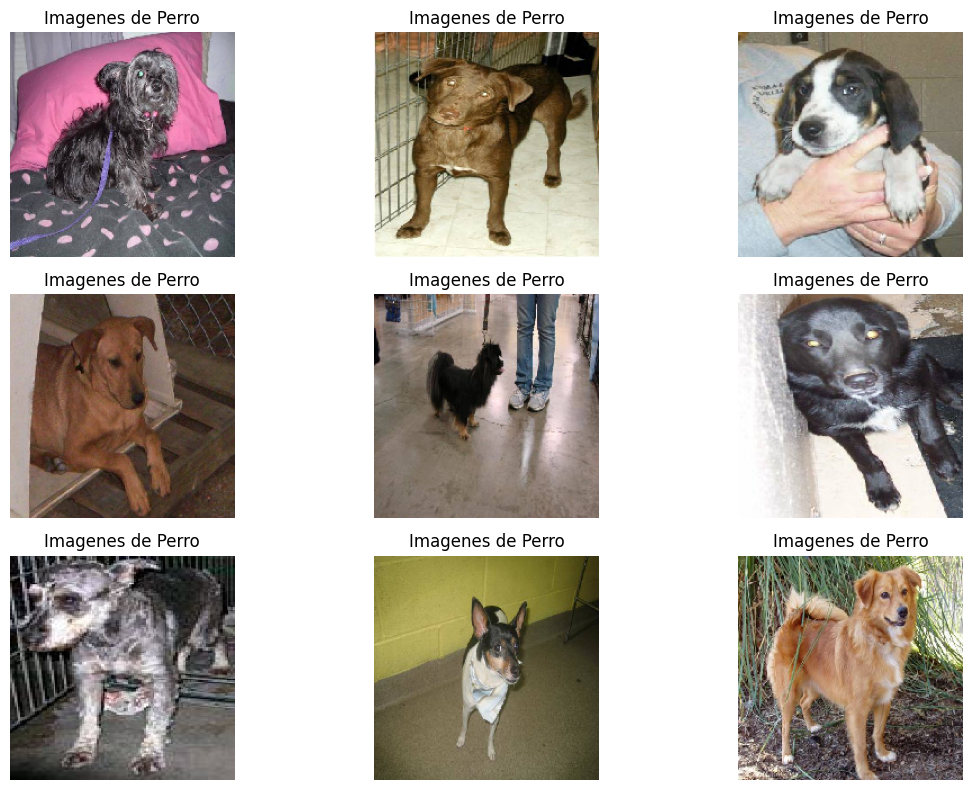

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

data_dir = '../data/raw/train'
subfolder_dog = os.path.join(data_dir,'dog')

print(subfolder_dog)

img_dog = os.listdir(subfolder_dog)

dog_imagenes = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_dog, img_dog[i])
    img = image.load_img(ruta_imagen, target_size=[200,200])
    img_array = image.img_to_array(img)
    img_array = img_array/255.0
    dog_imagenes.append(img_array)

plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dog_imagenes[i])
    plt.axis('off')
    plt.title('Imagenes de Perro')

plt.tight_layout()
plt.show()


../data/raw/train\cat


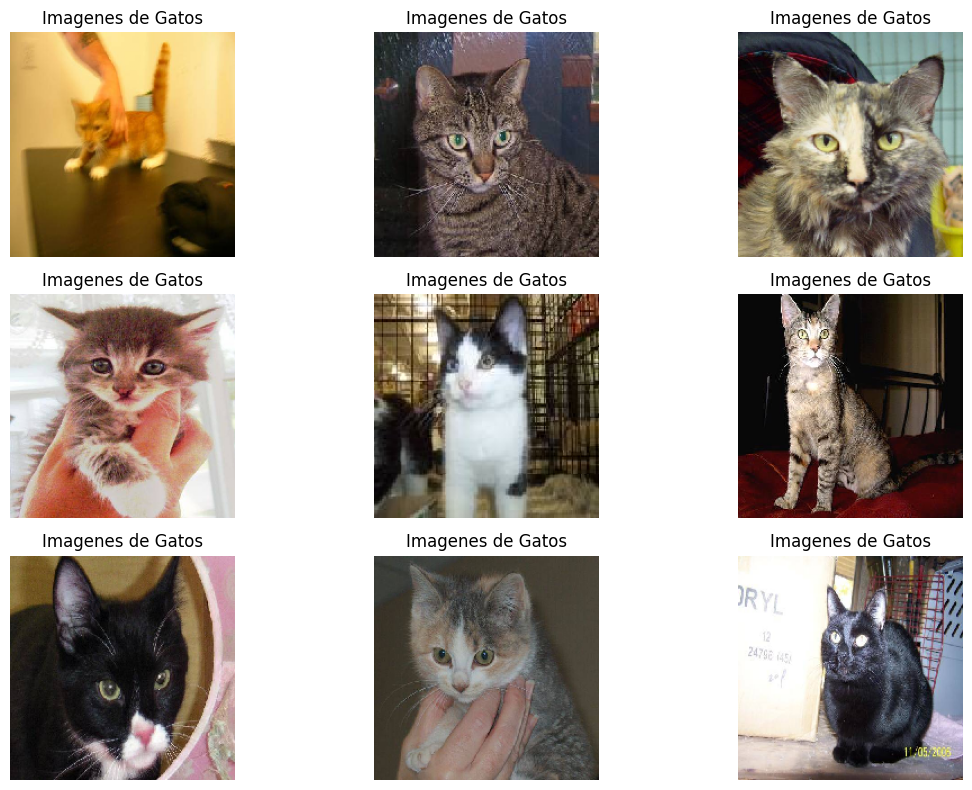

In [15]:
data_dir = '../data/raw/train'
subfolder_cat = os.path.join(data_dir,'cat')

print(subfolder_cat)

img_cat = os.listdir(subfolder_cat)

cat_imagenes = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_cat, img_cat[i])
    img = image.load_img(ruta_imagen, target_size=[200,200])
    img_array = image.img_to_array(img)
    img_array = img_array/255.0
    cat_imagenes.append(img_array)

plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cat_imagenes[i])
    plt.axis('off')
    plt.title('Imagenes de Gatos')

plt.tight_layout()
plt.show()
    


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/raw/train'
test_dir = '../data/raw'
image_size= (200,200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes=['dog','cat']
    )

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes=['test1']
    )

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))




c:\Users\sergi\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer= Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [27]:
model.fit(train_data, epochs=1)

c:\Users\sergi\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/782 ━━━━━━━━━━━━━━━━━━━━ 3:20:30 18s/step - accuracy: 0.4870 - loss: 186.3480

In [1]:

model.save('../models/modelo.h5')

NameError: name 'model' is not defined

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')
history = model.fit(train_data, epochs=3, validation_data=test_data, callbacks=[checkpoint,early], steps_per_epoch=100, validation_steps=10)
